<a href="https://colab.research.google.com/github/sakshimodi04/Data_Science/blob/main/Eastwest_airlines__assignment_HC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [2]:
airlines = pd.read_csv('/content/EastWestAirlines.csv')

hierarchial clustering

In [3]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
air2=airlines.drop(['ID#'],axis=1)
air2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
#normalizing function
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)

In [8]:
#normalized data considering numerical part to the dataframe
df_norm = norm_func(airlines.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


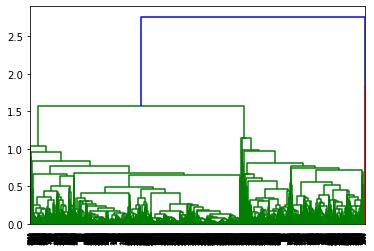

In [33]:
# create dendogram
dendrogram = sch.dendrogram(sch.linkage(df_norm,method = 'average'))

In [34]:
#create cluster
hc = AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="average")


In [35]:
#saving clusters
y_hc = hc.fit_predict(df_norm)
clusters = pd.DataFrame(y_hc,columns=['clusters'])
clusters

,clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [36]:
df_norm['h_clusterid'] = clusters

In [37]:
df_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.0,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1513,0.073189,0.152853,0.00,0.0,0.0,0.043855,0.093023,0.022715,0.037736,0.584157,1.0,0
1512,0.002803,0.000000,0.00,0.0,0.0,0.002275,0.023256,0.000000,0.000000,0.593682,1.0,0
3162,0.060535,0.000000,0.00,0.0,0.0,0.012136,0.046512,0.006490,0.037736,0.187364,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.0,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
275,1.000000,0.000000,0.00,0.0,0.0,0.064880,0.372093,0.156505,0.433962,0.877864,1.0,2
3594,0.016200,0.000000,0.75,0.0,0.0,0.317523,0.790698,0.455917,0.867925,0.159513,1.0,3
3235,0.168364,0.000000,0.00,0.0,0.0,0.099213,0.674419,0.417724,1.000000,0.273692,1.0,3
2015,0.031224,0.079656,0.75,0.0,0.0,0.306032,0.755814,0.717137,0.849057,0.461659,1.0,3


KMeans

In [38]:
# normalizing function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_air2 = scaler.fit_transform(air2)
scaled_air2

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -6.09176780e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -6.09176780e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -6.09176780e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.42429396e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -6.09176780e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -6.09176780e-01]])

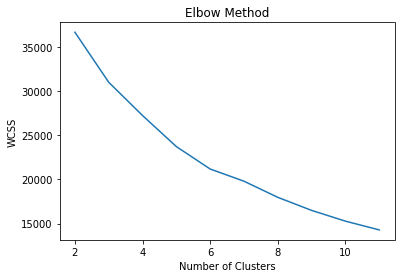

In [39]:
wcss = []
for i in range(2,12):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaled_air2)
  wcss.append(kmeans.inertia_)
plt.plot(range(2,12),wcss)
plt.title('Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [40]:
# build cluster algorithm
cluster_new = KMeans(5,random_state=42)
cluster_new.fit(scaled_air2)

KMeans(n_clusters=5, random_state=42)

In [41]:
cluster_new.labels_

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [42]:
#assigning clusters to new dataset
air2['clusterid_new']= cluster_new.labels_

In [43]:
air2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [44]:
air2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
1,1,44293.077409,98.530806,1.237362,1.000000,1.000395,4722.390205,6.885861,196.838468,0.614929,3699.326619,0.202607
2,2,188455.641176,961.558824,2.194118,1.000000,1.000000,30945.770588,26.111765,5277.958824,15.258824,4678.300000,0.800000
3,3,117119.906376,130.094431,3.736077,1.000000,1.001614,39793.209040,18.843422,332.092010,0.987086,4897.692494,0.651332
4,4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


In [45]:
air2[air2['clusterid_new']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,0
384,28193,0,5,1,4,103456,32,0,0,6980,1,0
850,25629,0,4,1,5,107308,36,600,2,5966,1,0
904,15835,0,2,1,5,112171,16,0,0,5825,1,0
1036,154664,0,4,1,3,73881,33,0,0,5769,0,0
1244,166465,0,4,1,4,98717,30,0,0,5531,0,0
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,0
1878,128302,0,5,1,4,132263,32,400,2,4103,1,0
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,0
1946,126873,0,4,1,5,95598,32,500,1,3880,1,0


DBSCAN

In [46]:
from sklearn.cluster import DBSCAN

In [47]:
array = air2.values
array

array([[28143,     0,     1, ...,  7000,     0,     1],
       [19244,     0,     1, ...,  6968,     0,     1],
       [41354,     0,     1, ...,  7034,     0,     1],
       ...,
       [73597,     0,     3, ...,  1402,     1,     3],
       [54899,     0,     1, ...,  1401,     0,     1],
       [ 3016,     0,     1, ...,  1398,     0,     1]])

In [48]:
stdscaler = StandardScaler().fit(array)
x = stdscaler.transform(array)

In [49]:
dbscan = DBSCAN(eps=1,min_samples=10)
dbscan.fit(x)

DBSCAN(eps=1, min_samples=10)

In [50]:
dbscan.labels_             # noisy labels are named as -1

array([0, 0, 0, ..., 3, 0, 0])

In [51]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,2
3995,2
3996,3
3997,0


In [52]:
clustered = pd.concat([air2,cl],axis=1)
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [53]:
clustered[clustered['cluster']==-1]
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0
